In [1]:
# https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87
import numpy as np
import pandas as pd
import matplotlib
import missingno as msno
%matplotlib inline

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df = pd.read_csv('enh.csv')
df.head()

,Unnamed: 0,aire_acond,antiguedad,bano_comp,bano_excus,bano_regad,bomba_agua,calefacc,calentador,chimenea,...,tot_hom,tot_integ,tot_muj,celular,tel_fijo,tv_paga,año,CVE_ENT,CVE_MUN,CVE_LOC
0,0,2,30,2,0,0,1,2,1,2,...,3,4,1,2,1,2,2014,1,1,1
1,1,2,30,2,0,0,1,2,1,2,...,2,6,4,1,1,2,2014,1,1,1
2,2,2,42,2,0,0,1,2,2,2,...,3,4,1,2,1,2,2015,1,1,1
3,3,2,42,2,0,0,1,2,2,2,...,2,6,4,1,1,2,2015,1,1,1
4,4,2,26,2,1,0,1,2,1,2,...,3,4,1,2,1,1,2014,1,1,1


In [4]:
df.drop(labels='Unnamed: 0', axis=1, inplace=True)

* 2014: 1
* 2015: 2
* 2016: 3
* 2017: 4

In [5]:
df.año.replace(({2014 : 1, 2015 : 2, 2016 : 3, 2017 : 4}), inplace=True)

In [6]:
df_copy = df.copy()

In [7]:
df_copy.shape

(254928, 60)

In [8]:
df_copy.replace({-1 : np.NaN}, inplace=True)

In [9]:
#df_copy.to_csv('enh_na.csv')

In [10]:
len(pd.isnull(df_copy).any(1).nonzero()[0].tolist())

83905

In [11]:
missingdata_df = df_copy.columns[df_copy.isnull().any()].tolist()
missingdata_df

['antiguedad',
 'bano_comp',
 'bano_excus',
 'bano_regad',
 'combustible',
 'computador',
 'dotac_agua',
 'focos_ahor',
 'focos_inca',
 'internet',
 'mat_pisos',
 'sanit_agua',
 'tipo_viv',
 'uso_compar',
 'celular',
 'tel_fijo',
 'tv_paga']

In [12]:
len(missingdata_df)

17

The `msno.matrix` nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion. 

The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum rows.

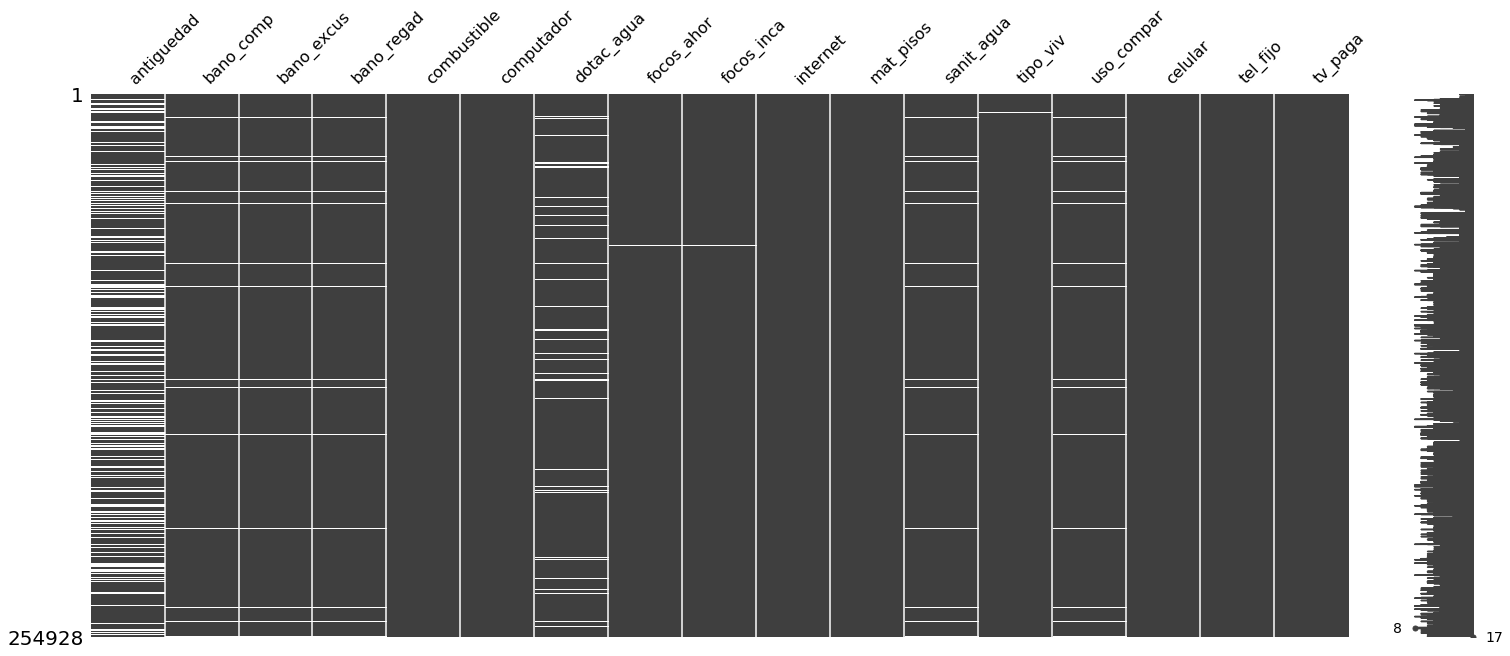

In [13]:
msno.matrix(df_copy[missingdata_df])

The missingno bar chart is a visualization of the data nullity. We log transformed the data on the y-axis to better visualize features with very large missing values.

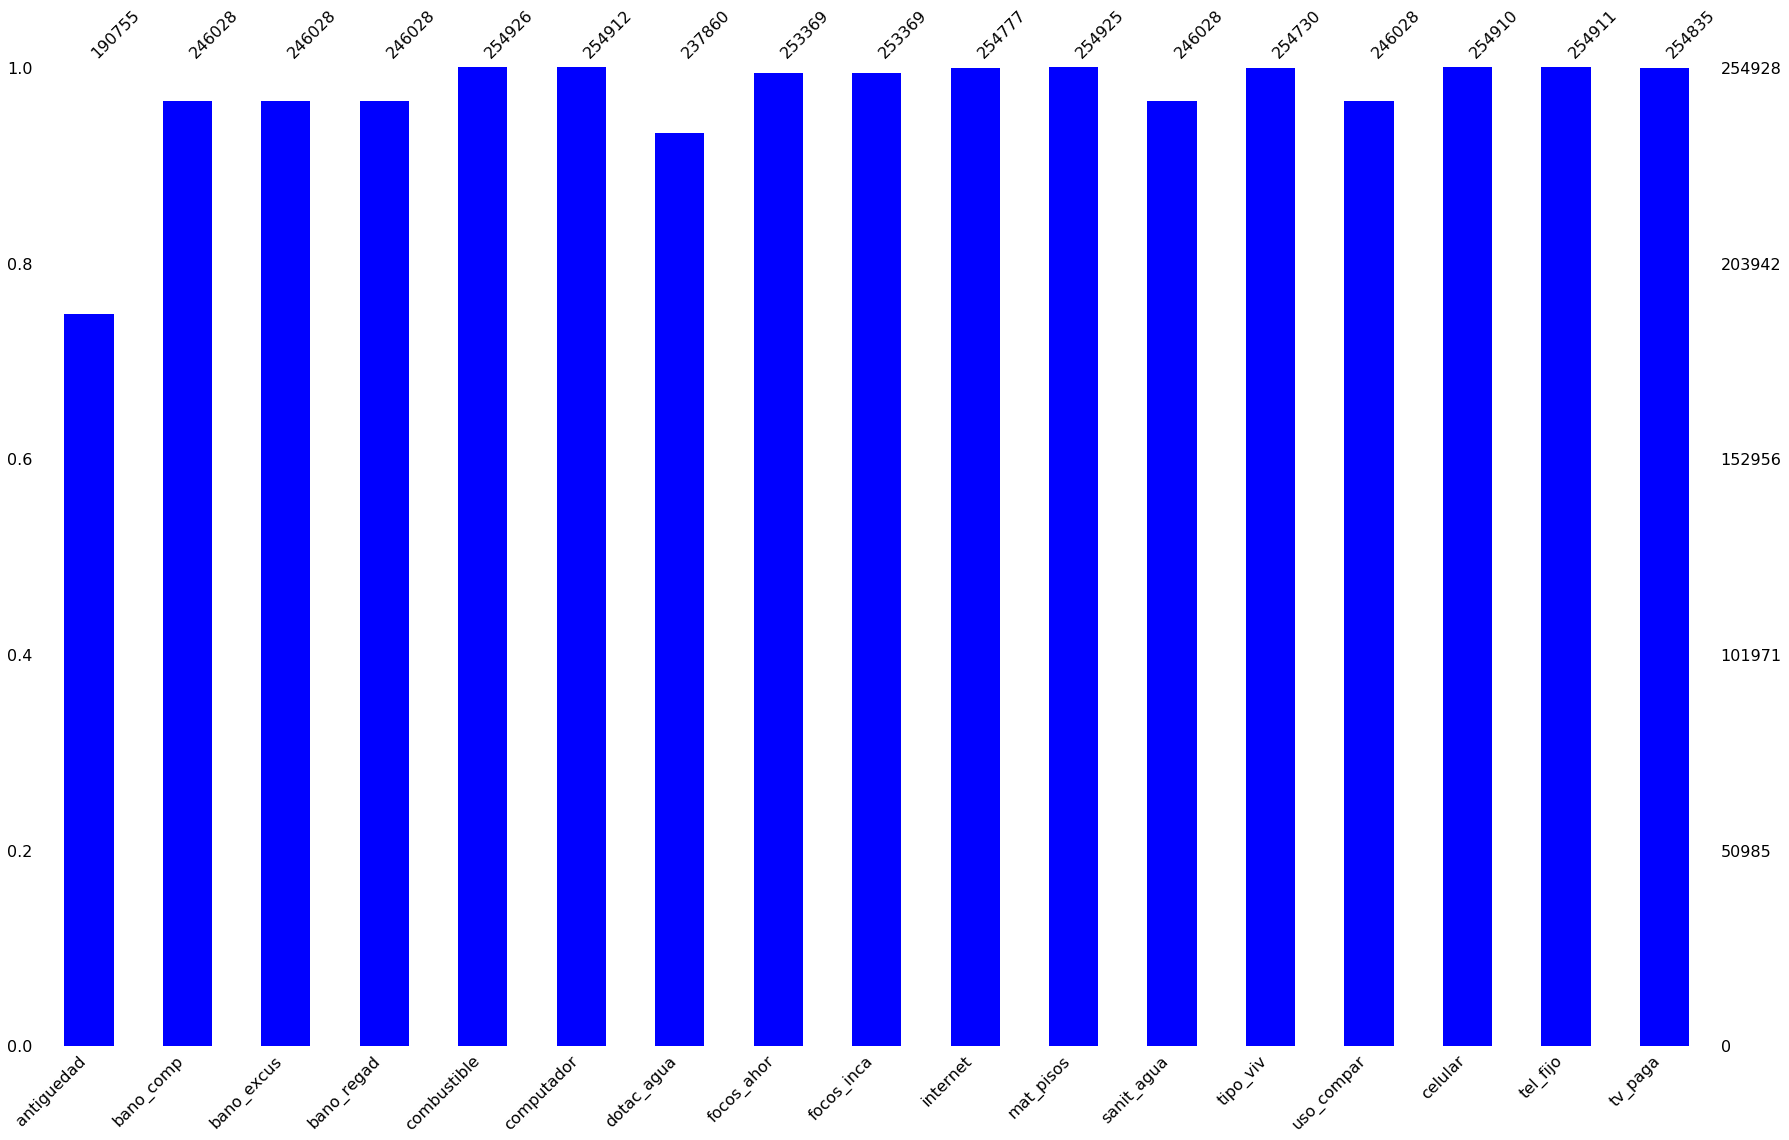

In [14]:
msno.bar(df_copy[missingdata_df], color="blue", log=False, figsize=(30,18))

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.

This map describes the degree of nullity relationship between the different features. The range of this nullity correlation is from $-1$ to $1$ $(-1 ≤ R ≤ 1)$. Features with no missing value are excluded in the heatmap. If the nullity correlation is very close to zero $(-0.05 < R < 0.05)$, no value will be displayed. Also, a perfect positive nullity correlation $(R=1)$ indicates when the first feature and the second feature both have corresponding missing values while a perfect negative nullity correlation, $(R=-1)$ means that one of the features is missing and the second is not missing.

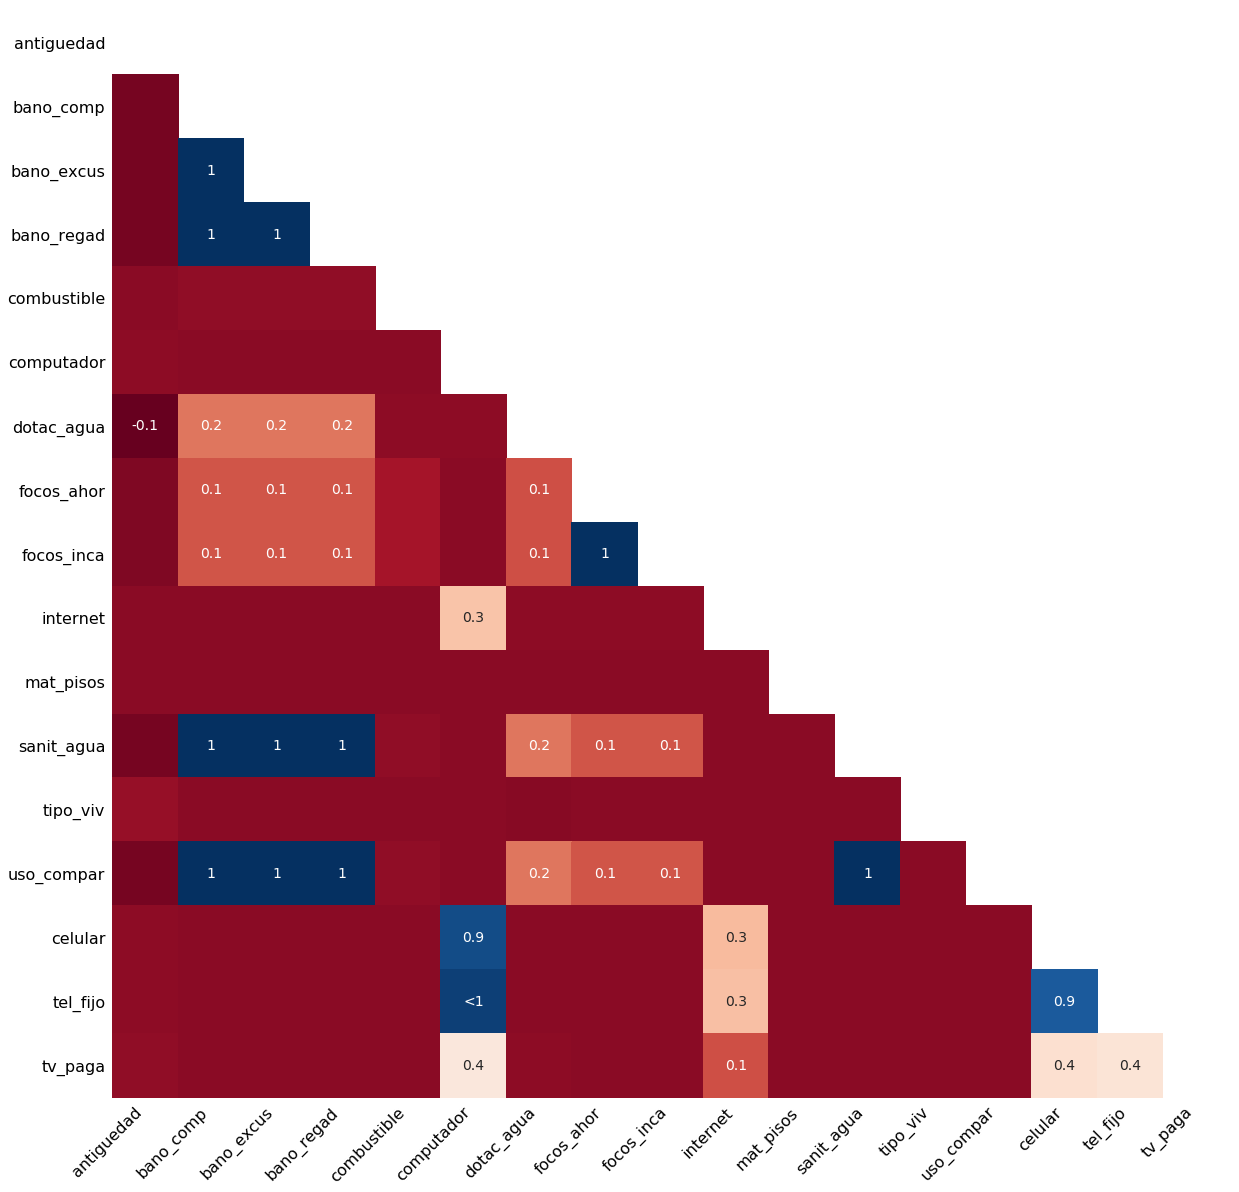

In [15]:
msno.heatmap(df_copy, figsize=(20,20))

In [16]:
no_missingdata_df = df_copy.columns[(df_copy.isnull().any() != True)].tolist()

In [17]:
df_copy[no_missingdata_df] = df_copy[no_missingdata_df].astype('int64')

In [18]:
no_missingdata_df.remove('CVE_ENT')
no_missingdata_df.remove('CVE_MUN')
no_missingdata_df.remove('CVE_LOC')
no_missingdata_df

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año']

In [20]:
len(no_missingdata_df)

40

## Impute `antiguedad`

In [21]:
from ycimpute.imputer import iterforest

In [22]:
data_antiguedad = no_missingdata_df
data_antiguedad.append('antiguedad')
data_antiguedad

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'antiguedad']

In [23]:
index_antiguedad_na = pd.isnull(df_copy[data_antiguedad]).any(1).nonzero()[0].tolist()
index_antiguedad_na

[13,
 14,
 26,
 27,
 32,
 33,
 40,
 41,
 44,
 45,
 47,
 49,
 50,
 53,
 54,
 55,
 56,
 59,
 60,
 61,
 65,
 66,
 67,
 68,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 82,
 83,
 86,
 87,
 90,
 91,
 92,
 104,
 105,
 113,
 114,
 119,
 120,
 121,
 122,
 125,
 126,
 136,
 137,
 142,
 143,
 148,
 149,
 158,
 159,
 160,
 164,
 165,
 166,
 167,
 174,
 175,
 176,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 188,
 189,
 196,
 197,
 198,
 199,
 200,
 201,
 206,
 207,
 208,
 209,
 210,
 211,
 214,
 215,
 218,
 219,
 236,
 237,
 240,
 241,
 242,
 243,
 250,
 251,
 266,
 267,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 286,
 287,
 290,
 291,
 297,
 298,
 299,
 300,
 303,
 304,
 312,
 313,
 362,
 363,
 369,
 370,
 393,
 394,
 395,
 396,
 419,
 420,
 433,
 434,
 437,
 438,
 441,
 442,
 445,
 446,
 449,
 450,
 459,
 464,
 466,
 479,
 480,
 485,
 486,
 487,
 488,
 495,
 496,
 514,
 516,
 521,
 529,
 530,
 546,
 547,
 548,
 560,
 561,
 563,
 567,
 568,
 569,
 571,
 582,
 583,
 593,
 594,
 596,
 597,
 598,
 603,


Porcentaje de NaN

In [24]:
(len(index_antiguedad_na)/df_copy.shape[0])*100

25.172990020711733

In [25]:
#index_antiguedad = [i for i in df_copy[data_antiguedad].index if i not in index_antiguedad_na]  

In [26]:
df_antiguedad = df_copy[data_antiguedad]
df_antiguedad.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,antiguedad
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,30.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,30.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,42.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,42.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,26.0


In [27]:
df_antiguedad.antiguedad.unique()

array([30., 42., 26., 20., 23., 16., 10., nan, 40., 33., 35., 36., 50.,
       34., 43., 45., 78.,  3., 60., 28., 70., 39., 32., 25., 15., 56.,
       80., 99., 69., 47., 46., 41., 14., 24., 12., 44., 19., 55., 27.,
        9.,  7., 22., 29.,  4., 31., 13.,  8.,  2.,  5.,  6., 37., 38.,
        1., 18., 11., 21., 17., 48., 90., 65., 52.,  0., 64., 54., 53.,
       84., 95., 72., 74., 49., 51., 75., 63., 58., 73., 62., 68., 67.,
       89., 86., 57., 59., 66., 83., 92., 81., 77., 98., 71., 85., 79.,
       94., 76., 87., 97., 88., 82., 61., 91., 93., 96.])

In [28]:
impute_antiguedad = iterforest.IterImput().complete(df_antiguedad.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [29]:
impute_antiguedad

array([[ 2. ,  1. ,  2. , ...,  1. ,  1. , 30. ],
       [ 2. ,  1. ,  2. , ...,  4. ,  1. , 30. ],
       [ 2. ,  1. ,  2. , ...,  1. ,  2. , 42. ],
       ...,
       [ 2. ,  2. ,  2. , ...,  3. ,  4. , 65. ],
       [ 2. ,  2. ,  2. , ...,  4. ,  4. , 25. ],
       [ 2. ,  2. ,  2. , ...,  1. ,  4. , 30.6]])

In [30]:
df_impute_antiguedad = pd.DataFrame(impute_antiguedad)
df_impute_antiguedad.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,30.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,30.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,42.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,42.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,26.0


In [31]:
df_impute_antiguedad.shape

(254928, 41)

In [32]:
df_impute_antiguedad.isnull().any().any()

False

In [33]:
df_impute_antiguedad.loc[index_antiguedad_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
13,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,4.0,2.0,1.0,22.100000
14,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,23.700000
26,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0,28.813333
27,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,1.0,4.0,3.0,1.0,25.166667
32,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0,24.800000
33,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,37.800000
40,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,20.600000
41,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,3.0,5.0,2.0,2.0,29.400000
44,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,35.500000
45,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,27.300000


In [34]:
df_impute_antiguedad = round(df_impute_antiguedad)

In [35]:
df_impute_antiguedad.loc[index_antiguedad_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
13,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,4.0,2.0,1.0,22.0
14,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,24.0
26,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0,29.0
27,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,1.0,4.0,3.0,1.0,25.0
32,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0,25.0
33,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,38.0
40,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,21.0
41,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,3.0,5.0,2.0,2.0,29.0
44,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,36.0
45,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,27.0


In [36]:
df_copy.antiguedad = df_impute_antiguedad[40]

## Impute `bano_comp`

In [38]:
data_bano_comp = no_missingdata_df
data_bano_comp.remove('antiguedad')
data_bano_comp.append('bano_comp')
data_bano_comp

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'bano_comp']

In [39]:
index_bano_comp_na = pd.isnull(df_copy[data_bano_comp]).any(1).nonzero()[0].tolist()
index_bano_comp_na

[2393,
 2394,
 2612,
 2613,
 2782,
 2783,
 2832,
 2833,
 3011,
 3028,
 3036,
 3039,
 3044,
 3047,
 3054,
 3055,
 3191,
 3192,
 3197,
 3198,
 3220,
 3247,
 3248,
 3251,
 3252,
 3297,
 3298,
 3335,
 4153,
 4432,
 5325,
 5326,
 5581,
 5706,
 5707,
 5749,
 5750,
 5963,
 5964,
 6805,
 6806,
 7250,
 7663,
 7664,
 8296,
 8307,
 8308,
 8366,
 8367,
 8568,
 9086,
 9087,
 9104,
 9105,
 9120,
 9121,
 9201,
 9202,
 9219,
 9220,
 9242,
 9243,
 9299,
 9542,
 9929,
 9968,
 9969,
 10080,
 10081,
 10120,
 10121,
 10443,
 10444,
 10633,
 10634,
 10635,
 10636,
 10652,
 10653,
 10772,
 10773,
 10812,
 10813,
 10846,
 10847,
 10881,
 10884,
 10897,
 10923,
 10924,
 10932,
 10937,
 10938,
 10967,
 10968,
 10971,
 10972,
 10975,
 10976,
 10979,
 10981,
 10982,
 10983,
 10984,
 10987,
 10992,
 10993,
 10994,
 10995,
 11015,
 11016,
 11071,
 11072,
 11101,
 11102,
 11105,
 11106,
 11204,
 11205,
 11218,
 11219,
 11238,
 11239,
 11256,
 11257,
 11258,
 11259,
 11289,
 11290,
 11335,
 11336,
 11353,
 11354,
 11

Porcentaje de NaN

In [45]:
(len(index_bano_comp_na)/df_copy.shape[0])*100

3.491181823887529

In [40]:
df_bano_comp = df_copy[data_bano_comp]
df_bano_comp.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,bano_comp
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,2.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,2.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,2.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,2.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,2.0


In [41]:
df_bano_comp.bano_comp.unique()

array([ 2.,  3.,  4.,  1.,  0.,  5., nan,  6.,  8.,  7.,  9.])

Porcentaje de NaN

In [42]:
impute_bano_comp = iterforest.IterImput().complete(df_bano_comp.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [43]:
impute_bano_comp

array([[2., 1., 2., ..., 1., 1., 2.],
       [2., 1., 2., ..., 4., 1., 2.],
       [2., 1., 2., ..., 1., 2., 2.],
       ...,
       [2., 2., 2., ..., 3., 4., 1.],
       [2., 2., 2., ..., 4., 4., 1.],
       [2., 2., 2., ..., 1., 4., 0.]])

In [46]:
df_impute_bano_comp = pd.DataFrame(impute_bano_comp)
df_impute_bano_comp.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,2.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,2.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,2.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,2.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,2.0


In [47]:
df_impute_bano_comp.shape

(254928, 41)

In [48]:
df_impute_bano_comp.isnull().any().any()

False

In [49]:
df_impute_bano_comp.loc[index_bano_comp_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
2393,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,0.0
2394,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2612,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,0.0
2613,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,7.0,5.0,1.0,0.0
2782,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,0.0
2783,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,6.0,4.0,1.0,0.0
2832,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,3.0,5.0,2.0,2.0,0.0
2833,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,1.0,5.0,4.0,2.0,0.0
3011,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,0.0
3028,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


In [50]:
df_impute_bano_comp = round(df_impute_bano_comp)

In [52]:
df_impute_bano_comp.loc[index_bano_comp_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
2393,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,0.0
2394,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2612,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,0.0
2613,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,7.0,5.0,1.0,0.0
2782,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,0.0
2783,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,6.0,4.0,1.0,0.0
2832,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,3.0,5.0,2.0,2.0,0.0
2833,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,1.0,5.0,4.0,2.0,0.0
3011,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,0.0
3028,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


In [53]:
df_copy.bano_comp = df_impute_bano_comp[40]

## Impute `bano_excus`

In [62]:
data_bano_excus = no_missingdata_df
#data_bano_excus.remove('bano_comp')
data_bano_excus.append('bano_excus')
data_bano_excus

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'bano_excus']

In [63]:
index_bano_excus_na = pd.isnull(df_copy[data_bano_excus]).any(1).nonzero()[0].tolist()
index_bano_excus_na

[2393,
 2394,
 2612,
 2613,
 2782,
 2783,
 2832,
 2833,
 3011,
 3028,
 3036,
 3039,
 3044,
 3047,
 3054,
 3055,
 3191,
 3192,
 3197,
 3198,
 3220,
 3247,
 3248,
 3251,
 3252,
 3297,
 3298,
 3335,
 4153,
 4432,
 5325,
 5326,
 5581,
 5706,
 5707,
 5749,
 5750,
 5963,
 5964,
 6805,
 6806,
 7250,
 7663,
 7664,
 8296,
 8307,
 8308,
 8366,
 8367,
 8568,
 9086,
 9087,
 9104,
 9105,
 9120,
 9121,
 9201,
 9202,
 9219,
 9220,
 9242,
 9243,
 9299,
 9542,
 9929,
 9968,
 9969,
 10080,
 10081,
 10120,
 10121,
 10443,
 10444,
 10633,
 10634,
 10635,
 10636,
 10652,
 10653,
 10772,
 10773,
 10812,
 10813,
 10846,
 10847,
 10881,
 10884,
 10897,
 10923,
 10924,
 10932,
 10937,
 10938,
 10967,
 10968,
 10971,
 10972,
 10975,
 10976,
 10979,
 10981,
 10982,
 10983,
 10984,
 10987,
 10992,
 10993,
 10994,
 10995,
 11015,
 11016,
 11071,
 11072,
 11101,
 11102,
 11105,
 11106,
 11204,
 11205,
 11218,
 11219,
 11238,
 11239,
 11256,
 11257,
 11258,
 11259,
 11289,
 11290,
 11335,
 11336,
 11353,
 11354,
 11

Porcentaje de NaN

In [57]:
(len(index_bano_excus_na)/df_copy.shape[0])*100

3.491181823887529

In [64]:
df_bano_excus = df_copy[data_bano_excus]
df_bano_excus.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,bano_excus
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,0.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,0.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,0.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,0.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,1.0


In [65]:
df_bano_excus.bano_excus.unique()

array([ 0.,  1.,  2.,  3., nan,  9.,  8.,  4.,  6.,  5.])

In [66]:
impute_bano_excus = iterforest.IterImput().complete(df_bano_excus.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [67]:
impute_bano_excus

array([[2., 1., 2., ..., 1., 1., 0.],
       [2., 1., 2., ..., 4., 1., 0.],
       [2., 1., 2., ..., 1., 2., 0.],
       ...,
       [2., 2., 2., ..., 3., 4., 0.],
       [2., 2., 2., ..., 4., 4., 0.],
       [2., 2., 2., ..., 1., 4., 1.]])

In [68]:
df_impute_bano_excus = pd.DataFrame(impute_bano_excus)
df_impute_bano_excus.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,0.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,0.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,0.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,0.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [69]:
df_impute_bano_excus.shape

(254928, 41)

In [70]:
df_impute_bano_excus.isnull().any().any()

False

In [71]:
df_impute_bano_excus.loc[index_bano_excus_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
2393,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,1.2
2394,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2612,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,1.0
2613,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,7.0,5.0,1.0,1.2
2782,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0
2783,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,6.0,4.0,1.0,1.0
2832,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,3.0,5.0,2.0,2.0,1.0
2833,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,1.0,5.0,4.0,2.0,1.0
3011,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,1.0
3028,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [50]:
df_impute_bano_excus = round(df_impute_bano_excus)

In [72]:
df_impute_bano_excus.loc[index_bano_excus_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
2393,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,1.2
2394,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2612,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,1.0
2613,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,7.0,5.0,1.0,1.2
2782,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0
2783,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,6.0,4.0,1.0,1.0
2832,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,3.0,5.0,2.0,2.0,1.0
2833,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,1.0,5.0,4.0,2.0,1.0
3011,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,1.0
3028,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [73]:
df_copy.bano_excus = df_impute_bano_excus[40]

## Impute `bano_regad`

In [74]:
data_bano_regad = no_missingdata_df
data_bano_regad.remove('bano_excus')
data_bano_regad.append('bano_regad')
data_bano_regad

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'bano_regad']

In [75]:
index_bano_regad_na = pd.isnull(df_copy[data_bano_regad]).any(1).nonzero()[0].tolist()
index_bano_regad_na

[2393,
 2394,
 2612,
 2613,
 2782,
 2783,
 2832,
 2833,
 3011,
 3028,
 3036,
 3039,
 3044,
 3047,
 3054,
 3055,
 3191,
 3192,
 3197,
 3198,
 3220,
 3247,
 3248,
 3251,
 3252,
 3297,
 3298,
 3335,
 4153,
 4432,
 5325,
 5326,
 5581,
 5706,
 5707,
 5749,
 5750,
 5963,
 5964,
 6805,
 6806,
 7250,
 7663,
 7664,
 8296,
 8307,
 8308,
 8366,
 8367,
 8568,
 9086,
 9087,
 9104,
 9105,
 9120,
 9121,
 9201,
 9202,
 9219,
 9220,
 9242,
 9243,
 9299,
 9542,
 9929,
 9968,
 9969,
 10080,
 10081,
 10120,
 10121,
 10443,
 10444,
 10633,
 10634,
 10635,
 10636,
 10652,
 10653,
 10772,
 10773,
 10812,
 10813,
 10846,
 10847,
 10881,
 10884,
 10897,
 10923,
 10924,
 10932,
 10937,
 10938,
 10967,
 10968,
 10971,
 10972,
 10975,
 10976,
 10979,
 10981,
 10982,
 10983,
 10984,
 10987,
 10992,
 10993,
 10994,
 10995,
 11015,
 11016,
 11071,
 11072,
 11101,
 11102,
 11105,
 11106,
 11204,
 11205,
 11218,
 11219,
 11238,
 11239,
 11256,
 11257,
 11258,
 11259,
 11289,
 11290,
 11335,
 11336,
 11353,
 11354,
 11

Porcentaje de NaN

In [76]:
(len(index_bano_regad_na)/df_copy.shape[0])*100

3.491181823887529

In [77]:
df_bano_regad = df_copy[data_bano_regad]
df_bano_regad.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,bano_regad
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,0.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,0.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,0.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,0.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,0.0


In [78]:
df_bano_regad.bano_regad.unique()

array([ 0.,  1., nan,  3.,  2.,  9.,  8.,  4.,  6.,  5.])

In [79]:
impute_bano_regad = iterforest.IterImput().complete(df_bano_regad.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [80]:
impute_bano_regad

array([[2., 1., 2., ..., 1., 1., 0.],
       [2., 1., 2., ..., 4., 1., 0.],
       [2., 1., 2., ..., 1., 2., 0.],
       ...,
       [2., 2., 2., ..., 3., 4., 0.],
       [2., 2., 2., ..., 4., 4., 0.],
       [2., 2., 2., ..., 1., 4., 0.]])

In [81]:
df_impute_bano_regad = pd.DataFrame(impute_bano_regad)
df_impute_bano_regad.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,0.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,0.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,0.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,0.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,0.0


In [82]:
df_impute_bano_regad.shape

(254928, 41)

In [83]:
df_impute_bano_regad.isnull().any().any()

False

In [84]:
df_impute_bano_regad.loc[index_bano_regad_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
2393,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,0.0
2394,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2612,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,0.0
2613,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,7.0,5.0,1.0,0.1
2782,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,0.0
2783,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,6.0,4.0,1.0,0.0
2832,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,3.0,5.0,2.0,2.0,0.0
2833,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,1.0,5.0,4.0,2.0,0.0
3011,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,0.0
3028,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


In [50]:
df_impute_bano_regad = round(df_impute_bano_regad)

In [85]:
df_impute_bano_regad.loc[index_bano_regad_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
2393,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,0.0
2394,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2612,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,0.0
2613,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,7.0,5.0,1.0,0.1
2782,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,0.0
2783,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,6.0,4.0,1.0,0.0
2832,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,3.0,5.0,2.0,2.0,0.0
2833,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,1.0,5.0,4.0,2.0,0.0
3011,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,0.0
3028,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


In [86]:
df_copy.bano_regad = df_impute_bano_regad[40]

## Impute `combustible`

In [87]:
data_combustible = no_missingdata_df
data_combustible.remove('bano_regad')
data_combustible.append('combustible')
data_combustible

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'combustible']

In [88]:
index_combustible_na = pd.isnull(df_copy[data_combustible]).any(1).nonzero()[0].tolist()
index_combustible_na

[185508, 185683]

Porcentaje de NaN

In [89]:
(len(index_combustible_na)/df_copy.shape[0])*100

0.0007845352413230402

In [90]:
df_combustible = df_copy[data_combustible]
df_combustible.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,combustible
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,3.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,3.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,3.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,3.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,3.0


In [91]:
df_combustible.combustible.unique()

array([ 3.,  4.,  1.,  6.,  5.,  2., nan])

In [92]:
impute_combustible = iterforest.IterImput().complete(df_combustible.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [93]:
impute_combustible

array([[2., 1., 2., ..., 1., 1., 3.],
       [2., 1., 2., ..., 4., 1., 3.],
       [2., 1., 2., ..., 1., 2., 3.],
       ...,
       [2., 2., 2., ..., 3., 4., 3.],
       [2., 2., 2., ..., 4., 4., 3.],
       [2., 2., 2., ..., 1., 4., 3.]])

In [94]:
df_impute_combustible = pd.DataFrame(impute_combustible)
df_impute_combustible.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,3.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,3.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,3.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,3.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,3.0


In [95]:
df_impute_combustible.shape

(254928, 41)

In [96]:
df_impute_combustible.isnull().any().any()

False

In [97]:
df_impute_combustible.loc[index_combustible_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
185508,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0,3.0,2.5
185683,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,5.0,2.0,1.0,0.0,1.0,1.0,0.0,3.0,2.3


In [98]:
df_impute_combustible = round(df_impute_combustible)

In [99]:
df_impute_combustible.loc[index_combustible_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
185508,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0,3.0,2.0
185683,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,5.0,2.0,1.0,0.0,1.0,1.0,0.0,3.0,2.0


In [100]:
df_copy.combustible = df_impute_combustible[40]

In [101]:
missingdata_df = df_copy.columns[df_copy.isnull().any()].tolist()
missingdata_df

['computador',
 'dotac_agua',
 'focos_ahor',
 'focos_inca',
 'internet',
 'mat_pisos',
 'sanit_agua',
 'tipo_viv',
 'uso_compar',
 'celular',
 'tel_fijo',
 'tv_paga']

In [102]:
len(missingdata_df)

12

## Impute `computador`

In [103]:
data_computador = no_missingdata_df
data_computador.remove('combustible')
data_computador.append('computador')
data_computador

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'computador']

In [104]:
index_computador_na = pd.isnull(df_copy[data_computador]).any(1).nonzero()[0].tolist()
index_computador_na

[29143,
 29146,
 29147,
 29148,
 44438,
 44439,
 74704,
 74705,
 86981,
 86982,
 87212,
 87213,
 107584,
 107585,
 121809,
 121810]

Porcentaje de NaN

In [105]:
(len(index_computador_na)/df_copy.shape[0])*100

0.006276281930584321

In [106]:
df_computador = df_copy[data_computador]
df_computador.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,computador
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,1.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,2.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,1.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,2.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,1.0


In [107]:
df_computador.computador.unique()

array([ 1.,  2., nan])

In [108]:
impute_computador = iterforest.IterImput().complete(df_computador.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [109]:
impute_computador

array([[2., 1., 2., ..., 1., 1., 1.],
       [2., 1., 2., ..., 4., 1., 2.],
       [2., 1., 2., ..., 1., 2., 1.],
       ...,
       [2., 2., 2., ..., 3., 4., 2.],
       [2., 2., 2., ..., 4., 4., 2.],
       [2., 2., 2., ..., 1., 4., 2.]])

In [110]:
df_impute_computador = pd.DataFrame(impute_computador)
df_impute_computador.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,2.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,1.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,2.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [111]:
df_impute_computador.shape

(254928, 41)

In [112]:
df_impute_computador.isnull().any().any()

False

In [113]:
df_impute_computador.loc[index_computador_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
29143,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0,1.800000
29146,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,3.0,1.0,2.0,2.000000
29147,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,3.0,1.0,3.0,1.196667
29148,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,2.0,1.0,3.0,1.325000
44438,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,4.0,3.0,1.0,1.400000
44439,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,4.0,9.0,5.0,4.0,1.700000
74704,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,3.0,2.0,1.0,0.0,5.0,9.0,4.0,1.0,1.900000
74705,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,1.0,2.0,1.0,0.0,1.0,3.0,2.0,4.0,1.700000
86981,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,4.0,3.0,1.0,1.600000
86982,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,4.0,1.500000


In [114]:
df_impute_computador = round(df_impute_computador)

In [115]:
df_impute_computador.loc[index_computador_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
29143,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0,2.0
29146,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,3.0,1.0,2.0,2.0
29147,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,3.0,1.0,3.0,1.0
29148,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,2.0,1.0,3.0,1.0
44438,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,4.0,3.0,1.0,1.0
44439,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,4.0,9.0,5.0,4.0,2.0
74704,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,3.0,2.0,1.0,0.0,5.0,9.0,4.0,1.0,2.0
74705,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,1.0,2.0,1.0,0.0,1.0,3.0,2.0,4.0,2.0
86981,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,4.0,3.0,1.0,2.0
86982,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,4.0,2.0


In [116]:
df_copy.computador = df_impute_computador[40]

In [117]:
missingdata_df = df_copy.columns[df_copy.isnull().any()].tolist()
missingdata_df

['dotac_agua',
 'focos_ahor',
 'focos_inca',
 'internet',
 'mat_pisos',
 'sanit_agua',
 'tipo_viv',
 'uso_compar',
 'celular',
 'tel_fijo',
 'tv_paga']

In [118]:
len(missingdata_df)

11

## Impute `dotac_agua`

In [119]:
data_dotac_agua = no_missingdata_df
data_dotac_agua.remove('computador')
data_dotac_agua.append('dotac_agua')
data_dotac_agua

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'dotac_agua']

In [120]:
index_dotac_agua_na = pd.isnull(df_copy[data_dotac_agua]).any(1).nonzero()[0].tolist()
index_dotac_agua_na

[206,
 207,
 759,
 760,
 761,
 985,
 986,
 1603,
 1604,
 1724,
 2397,
 2398,
 2413,
 2414,
 2782,
 2783,
 2821,
 3006,
 3009,
 3033,
 3044,
 3056,
 3164,
 3165,
 3180,
 3181,
 3186,
 3187,
 3188,
 3213,
 3215,
 3220,
 3221,
 3233,
 3247,
 3248,
 3284,
 3285,
 3293,
 3294,
 3297,
 3298,
 3685,
 4088,
 4237,
 4238,
 4255,
 4256,
 4257,
 4258,
 4259,
 4372,
 4373,
 4618,
 4715,
 4716,
 4784,
 4785,
 4811,
 4820,
 4884,
 4885,
 4891,
 4892,
 4893,
 4894,
 4895,
 4896,
 5181,
 5182,
 5185,
 5186,
 5197,
 5333,
 5546,
 5547,
 5706,
 5707,
 5724,
 5725,
 5726,
 5727,
 5728,
 5729,
 5730,
 5731,
 5732,
 5733,
 5734,
 5735,
 5736,
 5737,
 5738,
 5739,
 5740,
 5741,
 5742,
 5743,
 5744,
 5745,
 5746,
 5787,
 5788,
 5811,
 5812,
 5842,
 5845,
 5852,
 5860,
 5861,
 5862,
 5863,
 5864,
 5865,
 5866,
 5867,
 5868,
 5869,
 5870,
 5871,
 5872,
 5873,
 5874,
 5875,
 5876,
 5877,
 5878,
 5879,
 5880,
 5881,
 5882,
 5883,
 5884,
 5885,
 5886,
 5887,
 5888,
 5889,
 5890,
 5891,
 5892,
 5893,
 5894,
 5895,

Porcentaje de NaN

In [121]:
(len(index_dotac_agua_na)/df_copy.shape[0])*100

6.695223749450825

In [122]:
df_dotac_agua = df_copy[data_dotac_agua]
df_dotac_agua.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,dotac_agua
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,1.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,1.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,1.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,1.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,1.0


In [123]:
df_dotac_agua.dotac_agua.unique()

array([ 1.,  2., nan,  3.,  4.,  5.])

In [124]:
impute_dotac_agua = iterforest.IterImput().complete(df_dotac_agua.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [125]:
impute_dotac_agua

array([[2., 1., 2., ..., 1., 1., 1.],
       [2., 1., 2., ..., 4., 1., 1.],
       [2., 1., 2., ..., 1., 2., 1.],
       ...,
       [2., 2., 2., ..., 3., 4., 1.],
       [2., 2., 2., ..., 4., 4., 1.],
       [2., 2., 2., ..., 1., 4., 1.]])

In [126]:
df_impute_dotac_agua = pd.DataFrame(impute_dotac_agua)
df_impute_dotac_agua.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,1.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,1.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,1.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [127]:
df_impute_dotac_agua.shape

(254928, 41)

In [128]:
df_impute_dotac_agua.isnull().any().any()

False

In [129]:
df_impute_dotac_agua.loc[index_dotac_agua_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
206,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,2.0,6.0,4.0,2.0,1.7
207,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,1.8
759,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,3.0,1.0,1.0,0.0,2.0,4.0,2.0,1.0,3.3
760,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,3.0,1.0,1.0,0.0,1.0,3.0,2.0,1.0,3.0
761,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,3.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0,2.9
985,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,3.0,8.0,5.0,1.0,1.8
986,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0
1603,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.1
1604,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,3.0,5.0,2.0,1.0,1.3
1724,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,5.0,1.0,1.0,0.0,3.0,9.0,6.0,1.0,2.9


In [130]:
df_impute_dotac_agua = round(df_impute_dotac_agua)

In [131]:
df_impute_dotac_agua.loc[index_dotac_agua_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
206,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,2.0,6.0,4.0,2.0,2.0
207,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0
759,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,3.0,1.0,1.0,0.0,2.0,4.0,2.0,1.0,3.0
760,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,3.0,1.0,1.0,0.0,1.0,3.0,2.0,1.0,3.0
761,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,3.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0,3.0
985,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,3.0,8.0,5.0,1.0,2.0
986,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0
1603,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1604,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,3.0,5.0,2.0,1.0,1.0
1724,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,5.0,1.0,1.0,0.0,3.0,9.0,6.0,1.0,3.0


In [132]:
df_copy.dotac_agua = df_impute_dotac_agua[40]

In [135]:
df_copy.dotac_agua.unique()

array([1., 2., 3., 4., 5.])

In [133]:
missingdata_df = df_copy.columns[df_copy.isnull().any()].tolist()
missingdata_df

['focos_ahor',
 'focos_inca',
 'internet',
 'mat_pisos',
 'sanit_agua',
 'tipo_viv',
 'uso_compar',
 'celular',
 'tel_fijo',
 'tv_paga']

In [134]:
len(missingdata_df)

10

## Impute `focos_ahor`

In [136]:
data_focos_ahor = no_missingdata_df
data_focos_ahor.remove('dotac_agua')
data_focos_ahor.append('focos_ahor')
data_focos_ahor

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'focos_ahor']

In [137]:
index_focos_ahor_na = pd.isnull(df_copy[data_focos_ahor]).any(1).nonzero()[0].tolist()
index_focos_ahor_na

[451,
 452,
 3044,
 3186,
 3191,
 3192,
 3212,
 3215,
 3216,
 3221,
 3721,
 3722,
 3723,
 5735,
 6015,
 6599,
 6819,
 7663,
 7664,
 7798,
 7799,
 7861,
 7862,
 8307,
 8308,
 8731,
 8732,
 8745,
 8750,
 8754,
 9219,
 9220,
 9225,
 9226,
 9261,
 9262,
 9269,
 9270,
 9273,
 9274,
 10197,
 10496,
 10812,
 10813,
 10932,
 10937,
 10938,
 11069,
 11070,
 11353,
 11354,
 11376,
 11377,
 11528,
 11773,
 11774,
 11890,
 11891,
 11902,
 11903,
 11906,
 11907,
 11908,
 11909,
 11910,
 11911,
 11914,
 11915,
 11916,
 11917,
 11944,
 11945,
 11950,
 11951,
 11952,
 11953,
 12015,
 12016,
 12036,
 12037,
 12038,
 12042,
 12043,
 12049,
 12056,
 12248,
 12311,
 12312,
 14255,
 14256,
 14318,
 14319,
 14525,
 14526,
 14914,
 14915,
 15008,
 15009,
 15028,
 15029,
 16113,
 17745,
 17941,
 17942,
 17945,
 17946,
 17949,
 17950,
 17953,
 17954,
 17957,
 17958,
 18821,
 19375,
 19376,
 19379,
 19380,
 19419,
 20089,
 20090,
 20093,
 20094,
 20097,
 20134,
 20138,
 20140,
 20141,
 20143,
 20145,
 20148,
 2

Porcentaje de NaN

In [138]:
(len(index_focos_ahor_na)/df_copy.shape[0])*100

0.6115452206113098

In [139]:
df_focos_ahor = df_copy[data_focos_ahor]
df_focos_ahor.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,focos_ahor
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,8.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,8.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,6.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,6.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,23.0


In [140]:
df_focos_ahor.focos_ahor.unique()

array([ 8.,  6., 23., 26., 14., 38., 30.,  0., 11.,  9.,  1.,  4., 20.,
        7., 13.,  5., 10., 18., 12.,  3.,  2., 15., 19., 32., 16., 21.,
       25., 75., 50., 17., nan, 24., 36., 48., 35., 40., 22., 34., 28.,
       60., 33., 27., 70., 90., 64., 37., 31., 29., 41., 42., 44., 49.,
       45., 99., 52., 98., 92., 43., 65., 96., 39., 53., 47., 55., 58.,
       62., 82., 63., 46., 80., 74., 57., 56., 51., 88., 66., 54., 77.,
       61., 95., 76.])

In [141]:
impute_focos_ahor = iterforest.IterImput().complete(df_focos_ahor.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [142]:
impute_focos_ahor

array([[2., 1., 2., ..., 1., 1., 8.],
       [2., 1., 2., ..., 4., 1., 8.],
       [2., 1., 2., ..., 1., 2., 6.],
       ...,
       [2., 2., 2., ..., 3., 4., 4.],
       [2., 2., 2., ..., 4., 4., 2.],
       [2., 2., 2., ..., 1., 4., 6.]])

In [143]:
df_impute_focos_ahor = pd.DataFrame(impute_focos_ahor)
df_impute_focos_ahor.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,8.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,8.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,6.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,6.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,23.0


In [144]:
df_impute_focos_ahor.shape

(254928, 41)

In [145]:
df_impute_focos_ahor.isnull().any().any()

False

In [146]:
df_impute_focos_ahor.loc[index_focos_ahor_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
451,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.200000
452,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,1.0,5.0,4.0,1.0,3.000000
3044,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,1.800000
3186,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,5.0,3.0,1.0,2.200000
3191,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,6.0,16.0,10.0,1.0,3.100000
3192,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,8.0,14.0,6.0,1.0,3.100000
3212,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,1.500000
3215,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.700000
3216,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,7.0,10.0,3.0,1.0,3.900000
3221,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,10.0,8.0,1.0,2.100000


In [147]:
df_impute_focos_ahor = round(df_impute_focos_ahor)

In [148]:
df_impute_focos_ahor.loc[index_focos_ahor_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
451,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
452,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,1.0,5.0,4.0,1.0,3.0
3044,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0
3186,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,5.0,3.0,1.0,2.0
3191,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,6.0,16.0,10.0,1.0,3.0
3192,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,8.0,14.0,6.0,1.0,3.0
3212,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0
3215,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0
3216,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,7.0,10.0,3.0,1.0,4.0
3221,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,10.0,8.0,1.0,2.0


In [152]:
df_copy.focos_ahor = df_impute_focos_ahor[40]

In [153]:
df_copy.focos_ahor.unique()

array([ 8.,  6., 23., 26., 14., 38., 30.,  0., 11.,  9.,  1.,  4., 20.,
        7., 13.,  5., 10., 18., 12.,  3.,  2., 15., 19., 32., 16., 21.,
       25., 75., 50., 17., 24., 36., 48., 35., 40., 22., 34., 28., 60.,
       33., 27., 70., 90., 64., 37., 31., 29., 41., 42., 44., 49., 45.,
       99., 52., 98., 92., 43., 65., 96., 39., 53., 47., 55., 58., 62.,
       82., 63., 46., 80., 74., 57., 56., 51., 88., 66., 54., 77., 61.,
       95., 76.])

In [154]:
missingdata_df = df_copy.columns[df_copy.isnull().any()].tolist()
missingdata_df

['focos_inca',
 'internet',
 'mat_pisos',
 'sanit_agua',
 'tipo_viv',
 'uso_compar',
 'celular',
 'tel_fijo',
 'tv_paga']

In [155]:
len(missingdata_df)

9

## Impute `focos_inca`

In [156]:
data_focos_inca = no_missingdata_df
data_focos_inca.remove('focos_ahor')
data_focos_inca.append('focos_inca')
data_focos_inca

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'focos_inca']

In [157]:
index_focos_inca_na = pd.isnull(df_copy[data_focos_inca]).any(1).nonzero()[0].tolist()
index_focos_inca_na

[451,
 452,
 3044,
 3186,
 3191,
 3192,
 3212,
 3215,
 3216,
 3221,
 3721,
 3722,
 3723,
 5735,
 6015,
 6599,
 6819,
 7663,
 7664,
 7798,
 7799,
 7861,
 7862,
 8307,
 8308,
 8731,
 8732,
 8745,
 8750,
 8754,
 9219,
 9220,
 9225,
 9226,
 9261,
 9262,
 9269,
 9270,
 9273,
 9274,
 10197,
 10496,
 10812,
 10813,
 10932,
 10937,
 10938,
 11069,
 11070,
 11353,
 11354,
 11376,
 11377,
 11528,
 11773,
 11774,
 11890,
 11891,
 11902,
 11903,
 11906,
 11907,
 11908,
 11909,
 11910,
 11911,
 11914,
 11915,
 11916,
 11917,
 11944,
 11945,
 11950,
 11951,
 11952,
 11953,
 12015,
 12016,
 12036,
 12037,
 12038,
 12042,
 12043,
 12049,
 12056,
 12248,
 12311,
 12312,
 14255,
 14256,
 14318,
 14319,
 14525,
 14526,
 14914,
 14915,
 15008,
 15009,
 15028,
 15029,
 16113,
 17745,
 17941,
 17942,
 17945,
 17946,
 17949,
 17950,
 17953,
 17954,
 17957,
 17958,
 18821,
 19375,
 19376,
 19379,
 19380,
 19419,
 20089,
 20090,
 20093,
 20094,
 20097,
 20134,
 20138,
 20140,
 20141,
 20143,
 20145,
 20148,
 2

Porcentaje de NaN

In [158]:
(len(index_focos_inca_na)/df_copy.shape[0])*100

0.6115452206113098

In [159]:
df_focos_inca = df_copy[data_focos_inca]
df_focos_inca.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,focos_inca
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,8.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,8.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,0.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,0.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,0.0


In [161]:
df_focos_inca.focos_inca.unique()

array([ 8.,  0., 12.,  4.,  1., 13.,  6.,  5.,  7.,  3.,  2., 49., 10.,
        9., 50., 15., 14., nan, 11., 99., 24., 19., 17., 30., 18., 25.,
       16., 20., 22., 21., 60., 98., 40., 28., 33., 29., 70., 65., 23.,
       34., 39., 26., 32., 42., 27., 35., 31., 80., 45., 38., 75., 36.,
       46., 78., 90., 37., 91.])

In [162]:
impute_focos_inca = iterforest.IterImput().complete(df_focos_inca.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [163]:
impute_focos_inca

array([[2., 1., 2., ..., 1., 1., 8.],
       [2., 1., 2., ..., 4., 1., 8.],
       [2., 1., 2., ..., 1., 2., 0.],
       ...,
       [2., 2., 2., ..., 3., 4., 1.],
       [2., 2., 2., ..., 4., 4., 4.],
       [2., 2., 2., ..., 1., 4., 0.]])

In [164]:
df_impute_focos_inca = pd.DataFrame(impute_focos_inca)
df_impute_focos_inca.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,8.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,8.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,0.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,0.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,0.0


In [166]:
df_impute_focos_inca.shape

(254928, 41)

In [167]:
df_impute_focos_inca.isnull().any().any()

False

In [168]:
df_impute_focos_inca.loc[index_focos_inca_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
451,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,8.0
452,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,1.0,5.0,4.0,1.0,7.0
3044,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,0.8
3186,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,5.0,3.0,1.0,2.6
3191,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,6.0,16.0,10.0,1.0,1.5
3192,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,8.0,14.0,6.0,1.0,1.5
3212,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,0.7
3215,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.4
3216,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,7.0,10.0,3.0,1.0,5.9
3221,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,10.0,8.0,1.0,0.6


In [169]:
df_impute_focos_inca = round(df_impute_focos_inca)

In [170]:
df_impute_focos_inca.loc[index_focos_inca_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
451,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,8.0
452,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,1.0,5.0,4.0,1.0,7.0
3044,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0
3186,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,5.0,3.0,1.0,3.0
3191,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,6.0,16.0,10.0,1.0,2.0
3192,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,8.0,14.0,6.0,1.0,2.0
3212,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0
3215,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
3216,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,7.0,10.0,3.0,1.0,6.0
3221,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,10.0,8.0,1.0,1.0


In [171]:
df_copy.focos_inca = df_impute_focos_inca[40]

In [172]:
df_copy.focos_inca.unique()

array([ 8.,  0., 12.,  4.,  1., 13.,  6.,  5.,  7.,  3.,  2., 49., 10.,
        9., 50., 15., 14., 11., 99., 24., 19., 17., 30., 18., 25., 16.,
       20., 22., 21., 60., 98., 40., 28., 33., 29., 70., 65., 23., 34.,
       39., 26., 32., 42., 27., 35., 31., 80., 45., 38., 75., 36., 46.,
       78., 90., 37., 91.])

In [173]:
missingdata_df = df_copy.columns[df_copy.isnull().any()].tolist()
missingdata_df

['internet',
 'mat_pisos',
 'sanit_agua',
 'tipo_viv',
 'uso_compar',
 'celular',
 'tel_fijo',
 'tv_paga']

In [174]:
len(missingdata_df)

8

## Impute `internet`

In [175]:
data_internet = no_missingdata_df
data_internet.remove('focos_inca')
data_internet.append('internet')
data_internet

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'internet']

In [176]:
index_internet_na = pd.isnull(df_copy[data_internet]).any(1).nonzero()[0].tolist()
index_internet_na

[7555,
 7557,
 8523,
 8525,
 9781,
 9783,
 9810,
 9812,
 10291,
 10293,
 10700,
 10702,
 11209,
 11211,
 11322,
 11324,
 11354,
 11356,
 14248,
 14250,
 14804,
 14806,
 17552,
 17555,
 18126,
 18197,
 19022,
 19144,
 19818,
 19820,
 20826,
 22747,
 22749,
 22899,
 22901,
 25331,
 25333,
 26561,
 26563,
 27342,
 29143,
 29146,
 29147,
 29148,
 30037,
 30039,
 31370,
 31372,
 32062,
 32064,
 33797,
 33799,
 35658,
 37837,
 37839,
 38225,
 38454,
 42471,
 42695,
 44438,
 44439,
 45859,
 45861,
 51132,
 51134,
 53451,
 53454,
 53900,
 53902,
 53993,
 53995,
 54062,
 54064,
 54109,
 54111,
 54164,
 54166,
 54712,
 54714,
 55030,
 55032,
 60496,
 60498,
 65843,
 65845,
 66418,
 66420,
 66832,
 70320,
 70322,
 70658,
 72014,
 72016,
 72355,
 72381,
 73572,
 74704,
 74705,
 77704,
 77706,
 81156,
 81158,
 82150,
 82152,
 82812,
 82839,
 82841,
 86981,
 86982,
 87212,
 87213,
 87888,
 98393,
 98476,
 99493,
 99702,
 99834,
 101023,
 101079,
 102402,
 102936,
 104134,
 105581,
 106974,
 107584,


Porcentaje de NaN

In [177]:
(len(index_internet_na)/df_copy.shape[0])*100

0.059232410719889536

In [178]:
df_internet = df_copy[data_internet]
df_internet.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,internet
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,1.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,1.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,1.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,1.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,1.0


In [179]:
df_internet.internet.unique()

array([ 1.,  2., nan])

In [180]:
impute_internet = iterforest.IterImput().complete(df_internet.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [181]:
impute_internet

array([[2., 1., 2., ..., 1., 1., 1.],
       [2., 1., 2., ..., 4., 1., 1.],
       [2., 1., 2., ..., 1., 2., 1.],
       ...,
       [2., 2., 2., ..., 3., 4., 2.],
       [2., 2., 2., ..., 4., 4., 2.],
       [2., 2., 2., ..., 1., 4., 2.]])

In [182]:
df_impute_internet = pd.DataFrame(impute_internet)
df_impute_internet.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,1.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,1.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,1.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [183]:
df_impute_internet.shape

(254928, 41)

In [184]:
df_impute_internet.isnull().any().any()

False

In [185]:
df_impute_internet.loc[index_internet_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
7555,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,5.0,3.0,1.0,1.800000
7557,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,2.0,5.0,3.0,2.0,1.000000
8523,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,4.0,3.0,1.0,1.700000
8525,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,4.0,3.0,2.0,1.300000
9781,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,...,2.0,4.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.900000
9783,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,1.0,2.0,1.0,2.0,1.766667
9810,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,7.0,4.0,1.0,1.800000
9812,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,3.0,7.0,4.0,2.0,1.200000
10291,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0,1.100000
10293,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,3.0,1.0,2.0,1.583333


In [186]:
df_impute_internet = round(df_impute_internet)

In [187]:
df_impute_internet.loc[index_internet_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
7555,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,5.0,3.0,1.0,2.0
7557,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,2.0,5.0,3.0,2.0,1.0
8523,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,4.0,3.0,1.0,2.0
8525,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,4.0,3.0,2.0,1.0
9781,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,...,2.0,4.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0
9783,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0
9810,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,7.0,4.0,1.0,2.0
9812,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,3.0,7.0,4.0,2.0,1.0
10291,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0,1.0
10293,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,3.0,1.0,2.0,2.0


In [188]:
df_copy.internet = df_impute_internet[40]

In [189]:
df_copy.internet.unique()

array([1., 2.])

In [190]:
missingdata_df = df_copy.columns[df_copy.isnull().any()].tolist()
missingdata_df

['mat_pisos',
 'sanit_agua',
 'tipo_viv',
 'uso_compar',
 'celular',
 'tel_fijo',
 'tv_paga']

In [191]:
len(missingdata_df)

7

## Impute `mat_pisos`

In [197]:
data_mat_pisos = no_missingdata_df
#data_mat_pisos.remove('internet')
data_mat_pisos.append('mat_pisos')
data_mat_pisos

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'mat_pisos']

In [198]:
index_mat_pisos_na = pd.isnull(df_copy[data_mat_pisos]).any(1).nonzero()[0].tolist()
index_mat_pisos_na

[99085, 217217, 220627]

Porcentaje de NaN

In [199]:
(len(index_mat_pisos_na)/df_copy.shape[0])*100

0.0011768028619845603

In [200]:
df_mat_pisos = df_copy[data_mat_pisos]
df_mat_pisos.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,mat_pisos
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,3.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,3.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,3.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,3.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,3.0


In [201]:
df_mat_pisos.mat_pisos.unique()

array([ 3.,  2.,  1., nan])

In [202]:
impute_mat_pisos = iterforest.IterImput().complete(df_mat_pisos.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [203]:
impute_mat_pisos

array([[2., 1., 2., ..., 1., 1., 3.],
       [2., 1., 2., ..., 4., 1., 3.],
       [2., 1., 2., ..., 1., 2., 3.],
       ...,
       [2., 2., 2., ..., 3., 4., 2.],
       [2., 2., 2., ..., 4., 4., 2.],
       [2., 2., 2., ..., 1., 4., 2.]])

In [204]:
df_impute_mat_pisos = pd.DataFrame(impute_mat_pisos)
df_impute_mat_pisos.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,3.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,3.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,3.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,3.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,3.0


In [205]:
df_impute_mat_pisos.shape

(254928, 41)

In [206]:
df_impute_mat_pisos.isnull().any().any()

False

In [207]:
df_impute_mat_pisos.loc[index_mat_pisos_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
99085,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,2.8
217217,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,3.0,4.0,1.0,4.0,2.0
220627,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,0.0,2.0,4.0,2.0,4.0,2.5


In [208]:
df_impute_mat_pisos = round(df_impute_mat_pisos)

In [209]:
df_impute_mat_pisos.loc[index_mat_pisos_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
99085,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,3.0
217217,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,3.0,4.0,1.0,4.0,2.0
220627,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,0.0,2.0,4.0,2.0,4.0,2.0


In [210]:
df_copy.mat_pisos = df_impute_mat_pisos[40]

In [211]:
df_copy.mat_pisos.unique()

array([3., 2., 1.])

In [212]:
missingdata_df = df_copy.columns[df_copy.isnull().any()].tolist()
missingdata_df

['sanit_agua', 'tipo_viv', 'uso_compar', 'celular', 'tel_fijo', 'tv_paga']

In [213]:
len(missingdata_df)

6

## Impute `sanit_agua`

In [214]:
data_sanit_agua = no_missingdata_df
data_sanit_agua.remove('mat_pisos')
data_sanit_agua.append('sanit_agua')
data_sanit_agua

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'sanit_agua']

In [215]:
index_sanit_agua_na = pd.isnull(df_copy[data_sanit_agua]).any(1).nonzero()[0].tolist()
index_sanit_agua_na

[2393,
 2394,
 2612,
 2613,
 2782,
 2783,
 2832,
 2833,
 3011,
 3028,
 3036,
 3039,
 3044,
 3047,
 3054,
 3055,
 3191,
 3192,
 3197,
 3198,
 3220,
 3247,
 3248,
 3251,
 3252,
 3297,
 3298,
 3335,
 4153,
 4432,
 5325,
 5326,
 5581,
 5706,
 5707,
 5749,
 5750,
 5963,
 5964,
 6805,
 6806,
 7250,
 7663,
 7664,
 8296,
 8307,
 8308,
 8366,
 8367,
 8568,
 9086,
 9087,
 9104,
 9105,
 9120,
 9121,
 9201,
 9202,
 9219,
 9220,
 9242,
 9243,
 9299,
 9542,
 9929,
 9968,
 9969,
 10080,
 10081,
 10120,
 10121,
 10443,
 10444,
 10633,
 10634,
 10635,
 10636,
 10652,
 10653,
 10772,
 10773,
 10812,
 10813,
 10846,
 10847,
 10881,
 10884,
 10897,
 10923,
 10924,
 10932,
 10937,
 10938,
 10967,
 10968,
 10971,
 10972,
 10975,
 10976,
 10979,
 10981,
 10982,
 10983,
 10984,
 10987,
 10992,
 10993,
 10994,
 10995,
 11015,
 11016,
 11071,
 11072,
 11101,
 11102,
 11105,
 11106,
 11204,
 11205,
 11218,
 11219,
 11238,
 11239,
 11256,
 11257,
 11258,
 11259,
 11289,
 11290,
 11335,
 11336,
 11353,
 11354,
 11

Porcentaje de NaN

In [216]:
(len(index_sanit_agua_na)/df_copy.shape[0])*100

3.491181823887529

In [217]:
df_sanit_agua = df_copy[data_sanit_agua]
df_sanit_agua.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,sanit_agua
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,1.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,1.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,1.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,1.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,1.0


In [218]:
df_sanit_agua.sanit_agua.unique()

array([ 1.,  2., nan,  3.])

In [219]:
impute_sanit_agua = iterforest.IterImput().complete(df_sanit_agua.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [203]:
impute_sanit_agua

array([[2., 1., 2., ..., 1., 1., 3.],
       [2., 1., 2., ..., 4., 1., 3.],
       [2., 1., 2., ..., 1., 2., 3.],
       ...,
       [2., 2., 2., ..., 3., 4., 2.],
       [2., 2., 2., ..., 4., 4., 2.],
       [2., 2., 2., ..., 1., 4., 2.]])

In [220]:
df_impute_sanit_agua = pd.DataFrame(impute_sanit_agua)
df_impute_sanit_agua.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,1.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,1.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,1.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [221]:
df_impute_sanit_agua.shape

(254928, 41)

In [222]:
df_impute_sanit_agua.isnull().any().any()

False

In [223]:
df_impute_sanit_agua.loc[index_sanit_agua_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
2393,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,3.0
2394,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0
2612,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,1.7
2613,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,7.0,5.0,1.0,1.7
2782,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,3.0
2783,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,6.0,4.0,1.0,3.0
2832,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,3.0,5.0,2.0,2.0,1.8
2833,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,1.0,5.0,4.0,2.0,1.6
3011,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,1.9
3028,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0


In [224]:
df_impute_sanit_agua = round(df_impute_sanit_agua)

In [225]:
df_impute_sanit_agua.loc[index_sanit_agua_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
2393,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,3.0
2394,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0
2612,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,2.0
2613,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,7.0,5.0,1.0,2.0
2782,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,3.0
2783,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,6.0,4.0,1.0,3.0
2832,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,3.0,5.0,2.0,2.0,2.0
2833,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,1.0,5.0,4.0,2.0,2.0
3011,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,2.0
3028,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0


In [226]:
df_copy.sanit_agua = df_impute_sanit_agua[40]

In [227]:
df_copy.sanit_agua.unique()

array([1., 2., 3.])

In [228]:
missingdata_df = df_copy.columns[df_copy.isnull().any()].tolist()
missingdata_df

['tipo_viv', 'uso_compar', 'celular', 'tel_fijo', 'tv_paga']

In [229]:
len(missingdata_df)

5

## Impute `tipo_viv`

In [230]:
data_tipo_viv = no_missingdata_df
data_tipo_viv.remove('sanit_agua')
data_tipo_viv.append('tipo_viv')
data_tipo_viv

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'tipo_viv']

In [231]:
index_tipo_viv_na = pd.isnull(df_copy[data_tipo_viv]).any(1).nonzero()[0].tolist()
index_tipo_viv_na

[4128,
 4289,
 4330,
 4370,
 4371,
 4585,
 4586,
 4587,
 4588,
 4611,
 4612,
 4615,
 4616,
 4774,
 5619,
 5620,
 5668,
 5669,
 9137,
 9138,
 15494,
 15495,
 15720,
 15721,
 21070,
 21071,
 26359,
 39512,
 39513,
 42610,
 66648,
 66649,
 77915,
 81884,
 81885,
 82525,
 97082,
 97217,
 97449,
 97483,
 97484,
 97664,
 97699,
 97878,
 103309,
 115896,
 119425,
 119429,
 120396,
 122920,
 140446,
 140763,
 140960,
 140990,
 141005,
 141191,
 141301,
 144435,
 145601,
 147497,
 148762,
 149133,
 152816,
 153123,
 153268,
 153337,
 154175,
 162176,
 162275,
 162306,
 163050,
 163061,
 163327,
 163331,
 164452,
 172677,
 173155,
 174271,
 174913,
 175650,
 176820,
 176844,
 179139,
 185320,
 198359,
 199236,
 199257,
 199308,
 199516,
 199772,
 199821,
 199834,
 199860,
 199867,
 199896,
 199916,
 199917,
 199966,
 200140,
 200142,
 200170,
 200209,
 200231,
 200459,
 203154,
 203302,
 203396,
 203910,
 204235,
 204389,
 206463,
 207158,
 207432,
 207967,
 208267,
 208866,
 209110,
 211600,
 2

Porcentaje de NaN

In [232]:
(len(index_tipo_viv_na)/df_copy.shape[0])*100

0.07766898889098098

In [233]:
df_tipo_viv = df_copy[data_tipo_viv]
df_tipo_viv.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,tipo_viv
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,1.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,1.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,1.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,1.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,1.0


In [234]:
df_tipo_viv.tipo_viv.unique()

array([ 1.,  3.,  5.,  2., nan,  4.])

In [235]:
impute_tipo_viv = iterforest.IterImput().complete(df_tipo_viv.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [236]:
impute_tipo_viv

array([[2., 1., 2., ..., 1., 1., 1.],
       [2., 1., 2., ..., 4., 1., 1.],
       [2., 1., 2., ..., 1., 2., 1.],
       ...,
       [2., 2., 2., ..., 3., 4., 1.],
       [2., 2., 2., ..., 4., 4., 1.],
       [2., 2., 2., ..., 1., 4., 1.]])

In [243]:
df_impute_tipo_viv = pd.DataFrame(impute_tipo_viv)
df_impute_tipo_viv.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,1.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,1.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,1.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [244]:
df_impute_tipo_viv.shape

(254928, 41)

In [245]:
df_impute_tipo_viv.isnull().any().any()

False

In [246]:
df_impute_tipo_viv.loc[index_tipo_viv_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
4128,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.000000
4289,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,0.0,4.0,4.0,1.0,1.300000
4330,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,1.0,1.300000
4370,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,1.000000
4371,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.400000
4585,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,1.0,1.450000
4586,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,1.000000
4587,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,1.600000
4588,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,3.0,4.0,1.0,2.0,1.400000
4611,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,1.0,5.0,4.0,2.0,1.000000


In [247]:
df_impute_tipo_viv = round(df_impute_tipo_viv)

In [248]:
df_impute_tipo_viv.loc[index_tipo_viv_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
4128,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
4289,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,0.0,4.0,4.0,1.0,1.0
4330,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0
4370,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,1.0
4371,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
4585,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0
4586,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0
4587,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0
4588,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,3.0,4.0,1.0,2.0,1.0
4611,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,1.0,5.0,4.0,2.0,1.0


In [249]:
df_copy.tipo_viv = df_impute_tipo_viv[40]

In [250]:
df_copy.tipo_viv.unique()

array([1., 3., 5., 2., 4.])

In [251]:
missingdata_df = df_copy.columns[df_copy.isnull().any()].tolist()
missingdata_df

['uso_compar', 'celular', 'tel_fijo', 'tv_paga']

In [252]:
len(missingdata_df)

4

## Impute `uso_compar`

In [253]:
data_uso_compar = no_missingdata_df
data_uso_compar.remove('tipo_viv')
data_uso_compar.append('uso_compar')
data_uso_compar

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'uso_compar']

In [254]:
index_uso_compar_na = pd.isnull(df_copy[data_uso_compar]).any(1).nonzero()[0].tolist()
index_uso_compar_na

[2393,
 2394,
 2612,
 2613,
 2782,
 2783,
 2832,
 2833,
 3011,
 3028,
 3036,
 3039,
 3044,
 3047,
 3054,
 3055,
 3191,
 3192,
 3197,
 3198,
 3220,
 3247,
 3248,
 3251,
 3252,
 3297,
 3298,
 3335,
 4153,
 4432,
 5325,
 5326,
 5581,
 5706,
 5707,
 5749,
 5750,
 5963,
 5964,
 6805,
 6806,
 7250,
 7663,
 7664,
 8296,
 8307,
 8308,
 8366,
 8367,
 8568,
 9086,
 9087,
 9104,
 9105,
 9120,
 9121,
 9201,
 9202,
 9219,
 9220,
 9242,
 9243,
 9299,
 9542,
 9929,
 9968,
 9969,
 10080,
 10081,
 10120,
 10121,
 10443,
 10444,
 10633,
 10634,
 10635,
 10636,
 10652,
 10653,
 10772,
 10773,
 10812,
 10813,
 10846,
 10847,
 10881,
 10884,
 10897,
 10923,
 10924,
 10932,
 10937,
 10938,
 10967,
 10968,
 10971,
 10972,
 10975,
 10976,
 10979,
 10981,
 10982,
 10983,
 10984,
 10987,
 10992,
 10993,
 10994,
 10995,
 11015,
 11016,
 11071,
 11072,
 11101,
 11102,
 11105,
 11106,
 11204,
 11205,
 11218,
 11219,
 11238,
 11239,
 11256,
 11257,
 11258,
 11259,
 11289,
 11290,
 11335,
 11336,
 11353,
 11354,
 11

Porcentaje de NaN

In [255]:
(len(index_uso_compar_na)/df_copy.shape[0])*100

3.491181823887529

In [256]:
df_uso_compar = df_copy[data_uso_compar]
df_uso_compar.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,uso_compar
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,2.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,2.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,2.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,2.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,2.0


In [257]:
df_uso_compar.uso_compar.unique()

array([ 2.,  1., nan])

In [258]:
impute_uso_compar = iterforest.IterImput().complete(df_uso_compar.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [259]:
impute_uso_compar

array([[2., 1., 2., ..., 1., 1., 2.],
       [2., 1., 2., ..., 4., 1., 2.],
       [2., 1., 2., ..., 1., 2., 2.],
       ...,
       [2., 2., 2., ..., 3., 4., 2.],
       [2., 2., 2., ..., 4., 4., 2.],
       [2., 2., 2., ..., 1., 4., 2.]])

In [260]:
df_impute_uso_compar = pd.DataFrame(impute_uso_compar)
df_impute_uso_compar.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,2.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,2.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,2.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,2.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,2.0


In [261]:
df_impute_uso_compar.shape

(254928, 41)

In [262]:
df_impute_uso_compar.isnull().any().any()

False

In [263]:
df_impute_uso_compar.loc[index_uso_compar_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
2393,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,1.8
2394,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.7
2612,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,2.0
2613,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,7.0,5.0,1.0,2.0
2782,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,1.7
2783,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,6.0,4.0,1.0,1.8
2832,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,3.0,5.0,2.0,2.0,2.0
2833,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,1.0,5.0,4.0,2.0,2.0
3011,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,1.9
3028,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0


In [264]:
df_impute_uso_compar = round(df_impute_uso_compar)

In [265]:
df_impute_uso_compar.loc[index_uso_compar_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
2393,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,2.0
2394,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0
2612,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,2.0
2613,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,7.0,5.0,1.0,2.0
2782,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,2.0
2783,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,2.0,6.0,4.0,1.0,2.0
2832,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,3.0,5.0,2.0,2.0,2.0
2833,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,1.0,5.0,4.0,2.0,2.0
3011,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,2.0
3028,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0


In [266]:
df_copy.uso_compar = df_impute_uso_compar[40]

In [267]:
df_copy.uso_compar.unique()

array([2., 1.])

In [268]:
missingdata_df = df_copy.columns[df_copy.isnull().any()].tolist()
missingdata_df

['celular', 'tel_fijo', 'tv_paga']

In [269]:
len(missingdata_df)

3

## Impute `celular`

In [270]:
data_celular = no_missingdata_df
data_celular.remove('uso_compar')
data_celular.append('celular')
data_celular

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'celular']

In [271]:
index_celular_na = pd.isnull(df_copy[data_celular]).any(1).nonzero()[0].tolist()
index_celular_na

[29143,
 29146,
 29147,
 29148,
 44438,
 44439,
 74704,
 74705,
 86981,
 86982,
 87212,
 87213,
 107584,
 107585,
 121809,
 121810,
 123981,
 134876]

Porcentaje de NaN

In [272]:
(len(index_celular_na)/df_copy.shape[0])*100

0.007060817171907362

In [273]:
df_celular = df_copy[data_celular]
df_celular.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,celular
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,2.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,1.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,2.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,1.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,2.0


In [274]:
df_celular.celular.unique()

array([ 2.,  1., nan])

In [275]:
impute_celular = iterforest.IterImput().complete(df_celular.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [276]:
impute_celular

array([[2., 1., 2., ..., 1., 1., 2.],
       [2., 1., 2., ..., 4., 1., 1.],
       [2., 1., 2., ..., 1., 2., 2.],
       ...,
       [2., 2., 2., ..., 3., 4., 2.],
       [2., 2., 2., ..., 4., 4., 1.],
       [2., 2., 2., ..., 1., 4., 1.]])

In [277]:
df_impute_celular = pd.DataFrame(impute_celular)
df_impute_celular.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,2.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,1.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,2.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,1.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,2.0


In [278]:
df_impute_celular.shape

(254928, 41)

In [279]:
df_impute_celular.isnull().any().any()

False

In [280]:
df_impute_celular.loc[index_celular_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
29143,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0,1.100000
29146,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,3.0,1.0,2.0,1.400000
29147,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,3.0,1.0,3.0,1.391667
29148,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,2.0,1.0,3.0,1.175000
44438,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,4.0,3.0,1.0,1.250000
44439,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,4.0,9.0,5.0,4.0,1.200000
74704,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,3.0,2.0,1.0,0.0,5.0,9.0,4.0,1.0,1.100000
74705,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,1.0,2.0,1.0,0.0,1.0,3.0,2.0,4.0,1.100000
86981,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,4.0,3.0,1.0,1.150000
86982,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,4.0,1.100000


In [281]:
df_impute_celular = round(df_impute_celular)

In [282]:
df_impute_celular.loc[index_celular_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
29143,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0,1.0
29146,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,3.0,1.0,2.0,1.0
29147,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,3.0,1.0,3.0,1.0
29148,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,2.0,1.0,3.0,1.0
44438,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,4.0,3.0,1.0,1.0
44439,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,4.0,9.0,5.0,4.0,1.0
74704,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,3.0,2.0,1.0,0.0,5.0,9.0,4.0,1.0,1.0
74705,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,1.0,2.0,1.0,0.0,1.0,3.0,2.0,4.0,1.0
86981,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,4.0,3.0,1.0,1.0
86982,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,4.0,1.0


In [283]:
df_copy.celular = df_impute_celular[40]

In [284]:
df_copy.celular.unique()

array([2., 1.])

In [285]:
missingdata_df = df_copy.columns[df_copy.isnull().any()].tolist()
missingdata_df

['tel_fijo', 'tv_paga']

In [286]:
len(missingdata_df)

2

## Impute `tel_fijo`

In [288]:
data_tel_fijo = no_missingdata_df
data_tel_fijo.remove('celular')
data_tel_fijo.append('tel_fijo')
data_tel_fijo

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'tel_fijo']

In [289]:
index_tel_fijo_na = pd.isnull(df_copy[data_tel_fijo]).any(1).nonzero()[0].tolist()
index_tel_fijo_na

[29143,
 29146,
 29147,
 29148,
 44438,
 44439,
 74704,
 74705,
 86981,
 86982,
 87212,
 87213,
 107584,
 107585,
 121809,
 121810,
 131573]

Porcentaje de NaN

In [290]:
(len(index_tel_fijo_na)/df_copy.shape[0])*100

0.006668549551245842

In [291]:
df_tel_fijo = df_copy[data_tel_fijo]
df_tel_fijo.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,tel_fijo
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,1.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,1.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,1.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,1.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,1.0


In [292]:
df_tel_fijo.tel_fijo.unique()

array([ 1.,  2., nan])

In [293]:
impute_tel_fijo = iterforest.IterImput().complete(df_tel_fijo.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [294]:
impute_tel_fijo

array([[2., 1., 2., ..., 1., 1., 1.],
       [2., 1., 2., ..., 4., 1., 1.],
       [2., 1., 2., ..., 1., 2., 1.],
       ...,
       [2., 2., 2., ..., 3., 4., 1.],
       [2., 2., 2., ..., 4., 4., 1.],
       [2., 2., 2., ..., 1., 4., 1.]])

In [295]:
df_impute_tel_fijo = pd.DataFrame(impute_tel_fijo)
df_impute_tel_fijo.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,1.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,1.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,1.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [296]:
df_impute_tel_fijo.shape

(254928, 41)

In [297]:
df_impute_tel_fijo.isnull().any().any()

False

In [298]:
df_impute_tel_fijo.loc[index_tel_fijo_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
29143,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0,2.000000
29146,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,3.0,1.0,2.0,1.900000
29147,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,3.0,1.0,3.0,1.505000
29148,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,2.0,1.0,3.0,1.100000
44438,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,4.0,3.0,1.0,1.400000
44439,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,4.0,9.0,5.0,4.0,1.700000
74704,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,3.0,2.0,1.0,0.0,5.0,9.0,4.0,1.0,1.900000
74705,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,1.0,2.0,1.0,0.0,1.0,3.0,2.0,4.0,1.600000
86981,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,4.0,3.0,1.0,1.300000
86982,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,4.0,2.000000


In [299]:
df_impute_tel_fijo = round(df_impute_tel_fijo)

In [300]:
df_impute_tel_fijo.loc[index_tel_fijo_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
29143,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0,2.0
29146,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,3.0,1.0,2.0,2.0
29147,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,2.0,3.0,1.0,3.0,2.0
29148,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,2.0,1.0,3.0,1.0
44438,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,4.0,3.0,1.0,1.0
44439,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,0.0,4.0,9.0,5.0,4.0,2.0
74704,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,3.0,2.0,1.0,0.0,5.0,9.0,4.0,1.0,2.0
74705,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,1.0,2.0,1.0,0.0,1.0,3.0,2.0,4.0,2.0
86981,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,1.0,1.0,0.0,1.0,4.0,3.0,1.0,1.0
86982,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,4.0,2.0


In [301]:
df_copy.tel_fijo = df_impute_tel_fijo[40]

In [302]:
df_copy.tel_fijo.unique()

array([1., 2.])

In [303]:
missingdata_df = df_copy.columns[df_copy.isnull().any()].tolist()
missingdata_df

['tv_paga']

In [304]:
len(missingdata_df)

1

## Impute `tel_fijo`

In [305]:
data_tv_paga = no_missingdata_df
data_tv_paga.remove('tel_fijo')
data_tv_paga.append('tv_paga')
data_tv_paga

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'año',
 'tv_paga']

In [306]:
index_tv_paga_na = pd.isnull(df_copy[data_tv_paga]).any(1).nonzero()[0].tolist()
index_tv_paga_na

[3987,
 3989,
 4073,
 4075,
 6392,
 6395,
 8335,
 8337,
 8570,
 8572,
 26704,
 26708,
 29143,
 29146,
 29147,
 29148,
 31742,
 31744,
 34235,
 34237,
 34810,
 34812,
 44438,
 44439,
 46454,
 46457,
 47775,
 47777,
 56066,
 56068,
 61646,
 61648,
 62740,
 62741,
 62742,
 62744,
 62745,
 62746,
 74704,
 74705,
 80359,
 80361,
 82661,
 82663,
 86981,
 86982,
 87212,
 87213,
 97114,
 103200,
 105094,
 107282,
 107562,
 107584,
 107585,
 107886,
 109900,
 110894,
 111434,
 111771,
 113931,
 115694,
 115889,
 116226,
 116986,
 119649,
 121809,
 121810,
 123425,
 123833,
 123978,
 125123,
 125204,
 125495,
 125801,
 126782,
 127400,
 127754,
 127868,
 127962,
 128267,
 131145,
 131160,
 131317,
 131324,
 131325,
 131327,
 132635,
 133156,
 134564,
 135474,
 136053,
 137296]

Porcentaje de NaN

In [307]:
(len(index_tv_paga_na)/df_copy.shape[0])*100

0.03648088872152137

In [308]:
df_tv_paga = df_copy[data_tv_paga]
df_tv_paga.head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,año,tv_paga
0,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,3,4,1,1,2.0
1,2,1,2,1,2,1,1,2,2,2,...,1,4,1,1,0,2,6,4,1,2.0
2,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,3,4,1,2,2.0
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,0,2,6,4,2,2.0
4,2,1,2,1,2,1,1,2,2,2,...,2,4,2,1,0,3,4,1,1,1.0


In [309]:
df_tv_paga.tv_paga.unique()

array([ 2.,  1., nan])

In [310]:
impute_tv_paga = iterforest.IterImput().complete(df_tv_paga.as_matrix())

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [311]:
impute_tv_paga

array([[2., 1., 2., ..., 1., 1., 2.],
       [2., 1., 2., ..., 4., 1., 2.],
       [2., 1., 2., ..., 1., 2., 2.],
       ...,
       [2., 2., 2., ..., 3., 4., 1.],
       [2., 2., 2., ..., 4., 4., 1.],
       [2., 2., 2., ..., 1., 4., 1.]])

In [312]:
df_impute_tv_paga = pd.DataFrame(impute_tv_paga)
df_impute_tv_paga.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,2.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,1.0,2.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,2.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,2.0,2.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [313]:
df_impute_tv_paga.shape

(254928, 41)

In [314]:
df_impute_tv_paga.isnull().any().any()

False

In [315]:
df_impute_tv_paga.loc[index_tv_paga_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
3987,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,...,1.0,3.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,1.166667
3989,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,1.0,2.0,1.0,2.0,1.813333
4073,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.900000
4075,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,1.700000
6392,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,...,2.0,4.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.800000
6395,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,2.0,1.800000
8335,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,6.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,1.700000
8337,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,2.0,1.800000
8570,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,6.0,2.0,1.0,0.0,2.0,4.0,2.0,1.0,1.200000
8572,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,1.0,0.0,2.0,4.0,2.0,2.0,1.300000


In [316]:
df_impute_tv_paga = round(df_impute_tv_paga)

In [317]:
df_impute_tv_paga.loc[index_tv_paga_na]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
3987,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,...,1.0,3.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0
3989,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,4.0,2.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0
4073,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0
4075,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0
6392,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,...,2.0,4.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0
6395,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,2.0,2.0
8335,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,6.0,2.0,1.0,0.0,3.0,4.0,1.0,1.0,2.0
8337,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,2.0,2.0
8570,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,6.0,2.0,1.0,0.0,2.0,4.0,2.0,1.0,1.0
8572,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,1.0,0.0,2.0,4.0,2.0,2.0,1.0


In [318]:
df_copy.tv_paga = df_impute_tv_paga[40]

In [319]:
df_copy.tv_paga.unique()

array([2., 1.])

In [320]:
missingdata_df = df_copy.columns[df_copy.isnull().any()].tolist()
missingdata_df

[]

In [321]:
len(missingdata_df)

0

In [322]:
df_copy.to_csv('enh_impute.csv')